# some exploratory data analysis to figure out which variables have direct and clear impact on employee retention 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import numpy as np

In [29]:
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [30]:
d=df.pivot_table(index=None,columns='Department',aggfunc='size')
d

Department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [31]:
dd=df.pivot_table(index=['left'],columns='Department',aggfunc='size')
dd

Department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


In [32]:
left=dd.loc[1]
left

Department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: 1, dtype: int64

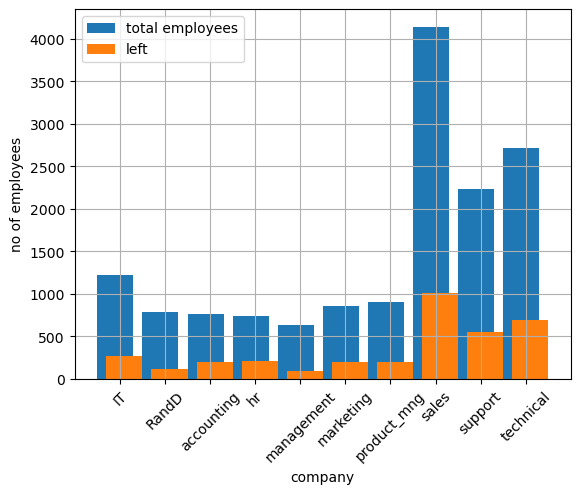

In [33]:
ypos=np.arange(len(d))
plt.xticks(ypos,d.index,rotation=45)
plt.xlabel('company')
plt.ylabel('no of employees')
plt.bar(ypos -0.1,d,label='total employees')
plt.bar(ypos +0.1,left,label='left')
plt.legend()
plt.grid()

In [34]:
s=df.pivot_table(index=None,columns='salary',aggfunc='size')
s

salary
high      1237
low       7316
medium    6446
dtype: int64

In [35]:
ss=df.pivot_table(index=['left'],columns='salary',aggfunc='size')
left1=ss.loc[1]
left1

salary
high        82
low       2172
medium    1317
Name: 1, dtype: int64

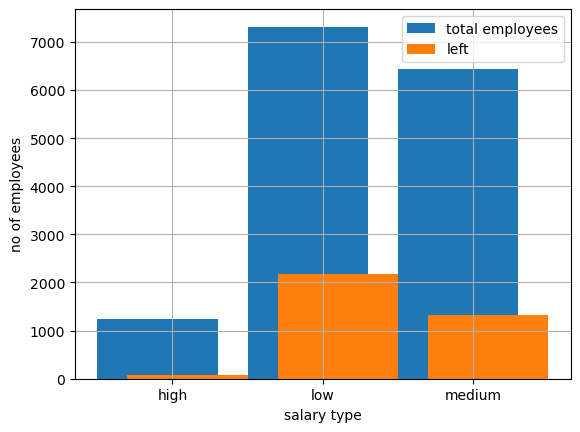

In [36]:
ypos1=np.arange(len(s))
plt.xticks(ypos1,s.index)
plt.xlabel('salary type')
plt.ylabel('no of employees')
plt.bar(ypos1 -0.1,s,label='total employees')
plt.bar(ypos1 +0.1,left1,label='left')
plt.legend()
plt.grid()

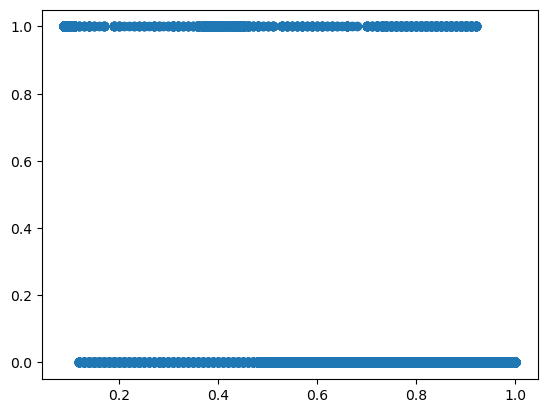

In [37]:
plt.scatter(df['satisfaction_level'],df['left'])



In [38]:
#plt.scatter(df['promotion_last_5years'],df['left'])
pl=df.pivot_table(index=None,columns='promotion_last_5years',aggfunc='size')

pll=df.pivot_table(index='left',columns='promotion_last_5years',aggfunc='size')
print(pll)
pll1=pll.loc[1]
p=['not promoted','promoted']

promotion_last_5years      0    1
left                             
0                      11128  300
1                       3552   19


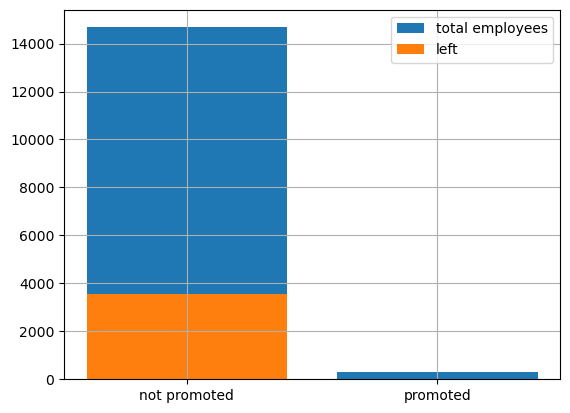

In [39]:
ypos2=np.arange(len(pl))
plt.xticks(ypos2,p)
#plt.xlabel('')
#plt.ylabel('no of employees')
plt.bar(ypos2,pl,label='total employees')
plt.bar(ypos2,pll1,label='left')
plt.legend()
plt.grid()

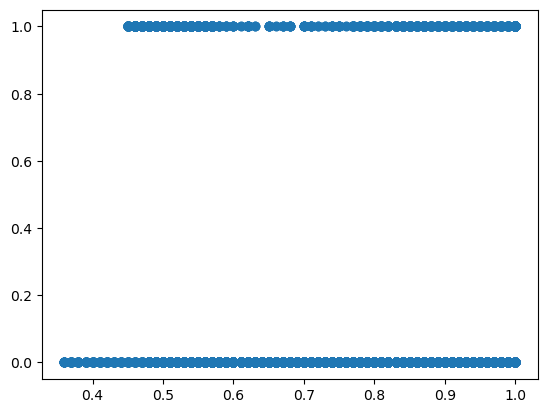

In [40]:
plt.scatter(df['last_evaluation'],df['left'])

number_project       2       3       4       5      6      7
left                                                        
0                821.0  3983.0  3956.0  2149.0  519.0    NaN
1               1567.0    72.0   409.0   612.0  655.0  256.0


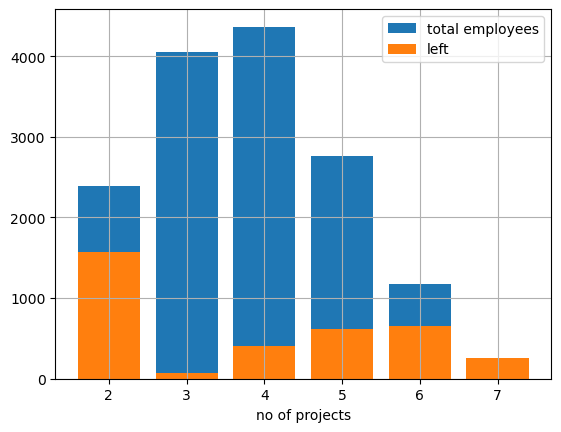

In [41]:
n=df.pivot_table(index=None,columns='number_project',aggfunc='size')

nl=df.pivot_table(index='left',columns='number_project',aggfunc='size')
print(nl)
nl1=nl.loc[1]

ypos3=np.arange(len(n))
plt.xticks(ypos3,n.index)
plt.xlabel('no of projects')
#plt.ylabel('no of employees')
plt.bar(ypos3,n,label='total employees')
plt.bar(ypos3,nl1,label='left')
plt.legend()
plt.grid()


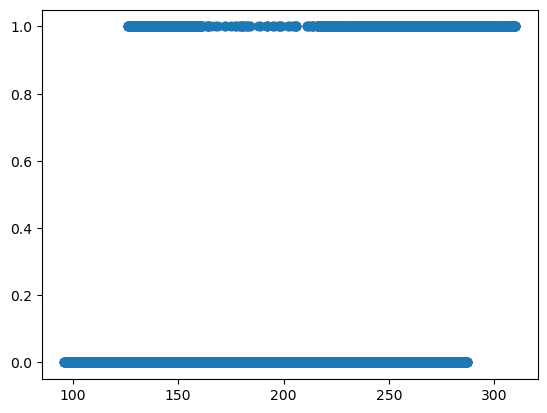

In [42]:
plt.scatter(df['average_montly_hours'],df['left'])

time_spend_company      2       3       4      5      6      7      8      10
left                                                                         
0                   3191.0  4857.0  1667.0  640.0  509.0  188.0  162.0  214.0
1                     53.0  1586.0   890.0  833.0  209.0    NaN    NaN    NaN


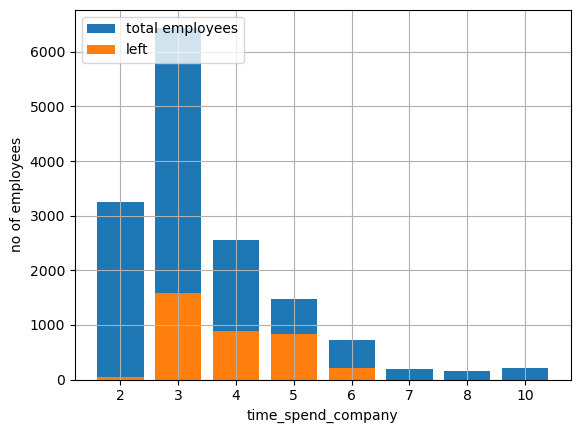

In [43]:
t=df.pivot_table(index=None,columns='time_spend_company',aggfunc='size')

tl=df.pivot_table(index='left',columns='time_spend_company',aggfunc='size')
print(tl)
tl1=tl.loc[1]

ypos4=np.arange(len(t))
plt.xticks(ypos4,t.index)
plt.xlabel('time_spend_company')
plt.ylabel('no of employees')
plt.bar(ypos4,t,label='total employees')
plt.bar(ypos4,tl1,label='left')
plt.legend()
plt.grid()

Work_accident     0     1
left                     
0              9428  2000
1              3402   169


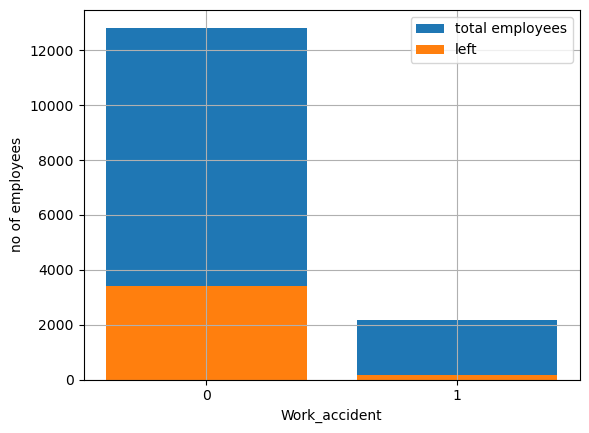

In [44]:
w=df.pivot_table(index=None,columns='Work_accident',aggfunc='size')

wl=df.pivot_table(index='left',columns='Work_accident',aggfunc='size')
print(wl)
wl1=wl.loc[1]

ypos5=np.arange(len(w))
plt.xticks(ypos5,w.index)
plt.xlabel('Work_accident')
plt.ylabel('no of employees')
plt.bar(ypos5,w,label='total employees')
plt.bar(ypos5,wl1,label='left')
plt.legend()
plt.grid()

In [45]:
dummy=pd.get_dummies(df.salary,prefix='salary')
dff=pd.concat([df,dummy],axis='columns')
dff.drop(columns='salary',inplace=True)
dff

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,support,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,support,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,support,False,True,False


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(dff[['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary_high','salary_low','salary_medium']],dff.left,train_size=0.8)

In [48]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\mdsk5\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model.score(xtest,ytest)

0.7996666666666666

In [50]:
leftt=df[df.left==1]
leftt.shape

(3571, 10)

In [51]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [52]:
df1=df.drop(['salary','Department'],axis='columns')
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='Department'>

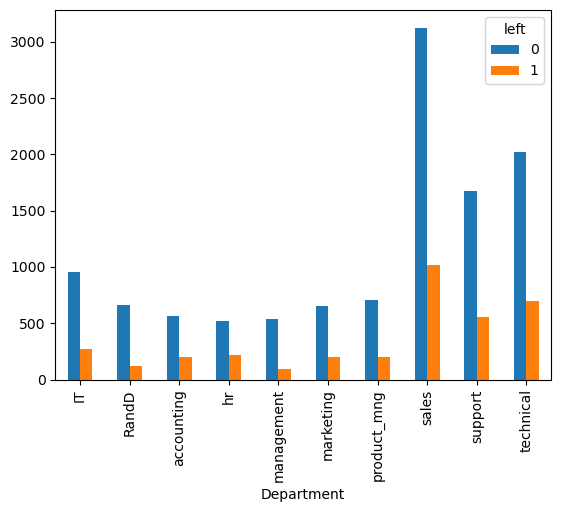

In [53]:
pd.crosstab(df.Department,df.left).plot(kind='bar')